In [1]:
%config Completer.use_jedi = False 

# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터 추가 : Add data -> tab:Competition Data -> Titanic
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

In [3]:
#raw data print
#test
#train
#train.dtypes
#train.info()
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# 병합 준비 , line count
ntrain = train.shape[0]
ntest = test.shape[0]
print("train cnt : {} , test cnt : {} ".format(ntrain , ntest))

y_train = train['Survived'].values
passId = test['PassengerId']

#type check
y_train_type = type(y_train)
y_train_dtype = y_train.dtype
print("y_train : {} , {} " .format(y_train_type , y_train_dtype) )
passId_type = type(passId)
passId_dtype = passId.dtype
print("passId : {} , {} " .format(passId_type , passId_dtype) )


# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data.head(n=10)

train cnt : 891 , test cnt : 418 
y_train : <class 'numpy.ndarray'> , int64 
passId : <class 'pandas.core.series.Series'> , int64 
data size is: (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#survived group by count
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

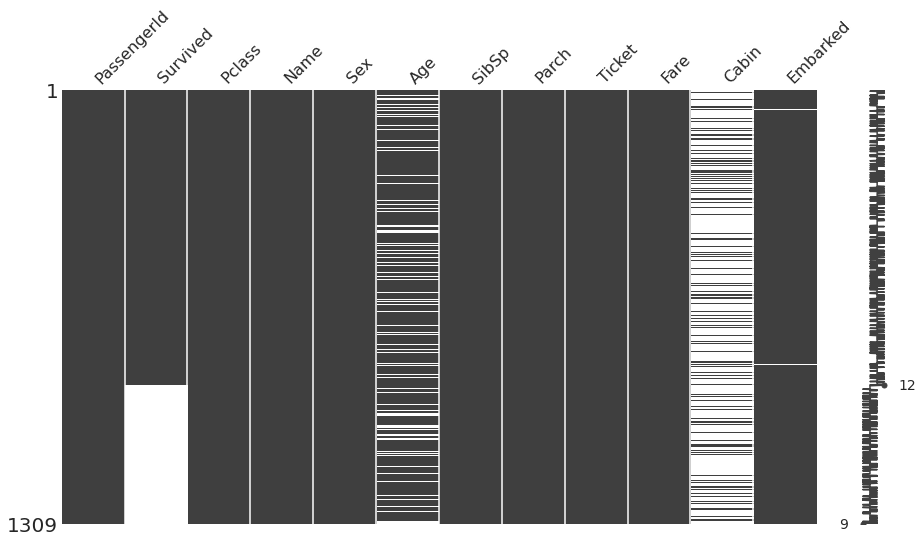

In [7]:
# 데이터 빈값 확인
missingno.matrix(data, figsize = (15,8))
data.isnull().sum() 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000  
[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [F

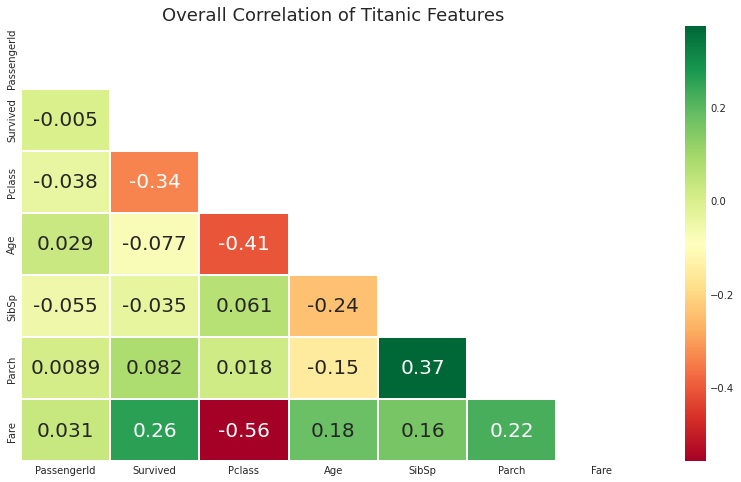

In [8]:
# Co-relation 매트릭스
corr = data.corr()
print(corr)

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
print(mask)
mask[np.triu_indices_from(mask)] = True
print(mask)

# 그래프 셋업
plt.figure(figsize=(14, 8))

# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)

#  Co-relation 매트릭스 런칭
#sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

0    549
1    342
Name: Survived, dtype: int64


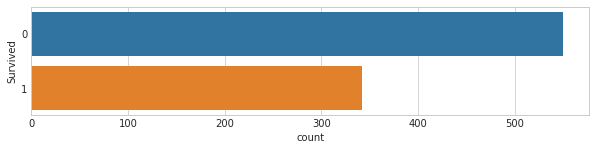

In [9]:
# Survived Column Check
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

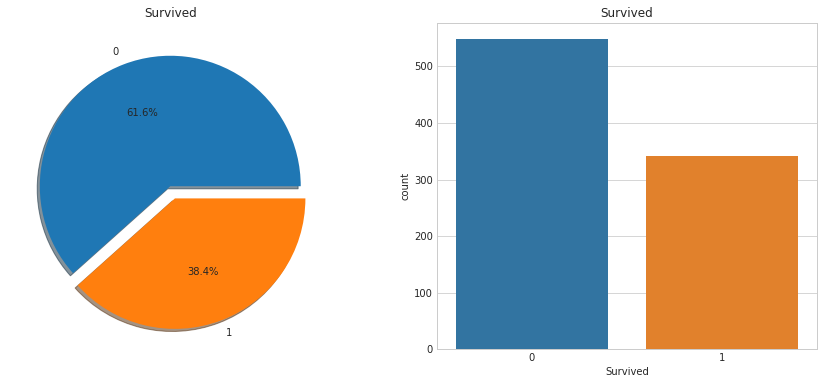

In [10]:
#1행2열 figsize 생성
f,ax=plt.subplots(1, 2, figsize=(15, 6))

#1,1에 Survived pie chart
# 0(die , Not Survived ) : 61.6% , 1(alive , Survived) : 38.4%
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#1,2에 Count chart
#0(die , Not Survived ) : 549 , 1(alive , Survived) : 342
#train['Survived'].value_counts()
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

#함수화
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

#piecount('Survived')


In [11]:
# train data 그룹화(Pclass , Survived) 후 값 카운팅
# value count in training data group by Pclass , Survived 
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')
#train.groupby(['Pclass','Survived'])['Survived'].count()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


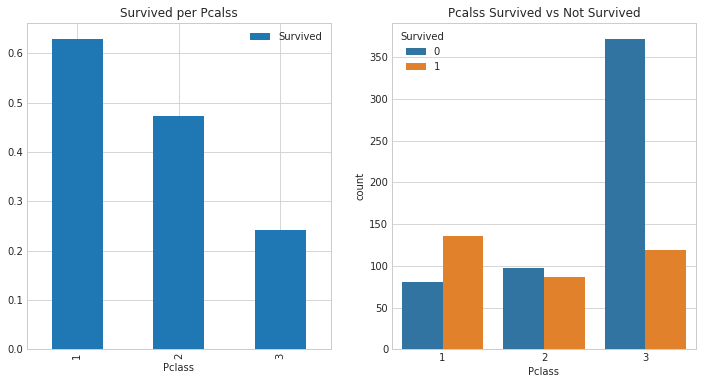

In [12]:
#1행2열 figsize 생성
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# train data 그룹화(Pclass , Survived) 후 값 평균
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')

# train data 그룹화(Pclass , Survived) 후 값 카운팅
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')

plt.show()

#생존자의 비율이 높은 곳은 Pclass : 1 
#사망자의 비율이 높은 곳은 Pclass : 3

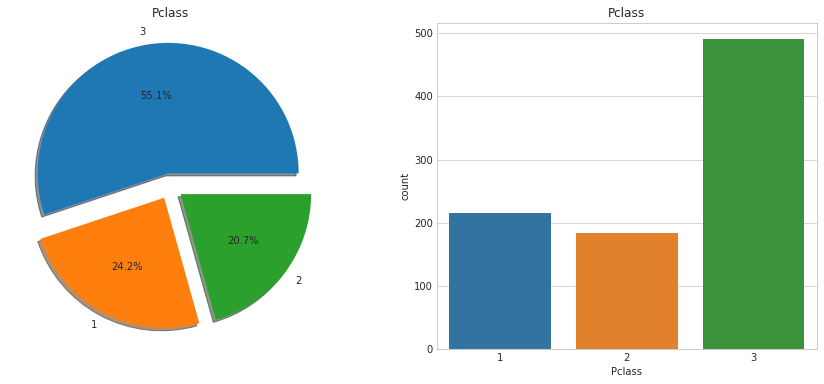

In [13]:
piecount("Pclass")
#좌석중 가장 높은 비율은 Pclass : 3 
#Pclass(1 ,2) 비율을 합쳐도 Pclass(3) 보다 작음

In [14]:
# 이름 종류별 카운팅
data.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [15]:
# 이름 이니셜 분류 #1 , 
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Initial, dtype: int64

In [16]:
# 이름 이니셜 분류 #1 , 각 성별 이름 분류(first name) 수
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [17]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')
#Dona의 Survived = NaN
#Dona를 특정한 부분으로 분류할 필요가 있음

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [18]:
# 이름 분류 #2 , Lastname
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')
#temp.LastName.value_counts()

# 이름 분류 #2 , 각 성별 이름 분류(Lastname) 수
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')
#data.Name

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamaki,Risien,Robbins,Robert,Robins,Roebling,Rogers,Romaine,Rommetvedt,Rood,Rosblom,Ross,Rothes,Rothschild,Rouse,Rugg,Rush,Ryan,Ryerson,Saad,Saalfeld,Sadlier,Sage,Sagesser,Salkjelsvik,Salon

In [19]:
# 'Name' , 'Initial' , 'LastName' 확인
#temp[['Name' , 'Initial' , 'LastName' ]].head(n = 10)
temp[['Name' , 'Initial' , 'LastName' ]].tail(n = 10)

,Name,Initial,LastName
408,"Riordan, Miss. Johanna Hannah""""",Miss,Riordan
409,"Peacock, Miss. Treasteall",Miss,Peacock
410,"Naughton, Miss. Hannah",Miss,Naughton
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)",Mrs,Minahan
412,"Henriksson, Miss. Jenny Lovisa",Miss,Henriksson
413,"Spector, Mr. Woolf",Mr,Spector
414,"Oliva y Ocana, Dona. Fermina",Dona,Oliva
415,"Saether, Mr. Simon Sivertsen",Mr,Saether
416,"Ware, Mr. Frederick",Mr,Ware
417,"Peter, Master. Michael J",Master,Peter


In [20]:
#Dona = NaN ...
#Dona 확인
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


In [21]:
#Dona의 나이 = 39
#Dona의 Nan -> Mrs
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

#Dona Check
temp.loc[temp['Name'] == 'Oliva y Ocana, Dona. Fermina']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Mrs,Oliva


In [22]:
#Dona Check 
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [23]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [24]:
#LastName to Number
#temp['LastName'].factorize()
temp['NumName'] = temp['LastName'].factorize()[0]

In [25]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,1,1,2,1,4,3,1,0,0,1,7,1,0,5,4,4,0,1,0,0,0,1,1,2,5,1,1,0,0,1,2,1,0,1,0,1,2,1,1,0,1,1,1,2,6,1,1,0,1,0,0,1,1,6,1,0,2,6,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,4,1,1,1,1,1,1,1,1,1,0,0,1,1,2,2,3,4,1,0,0,1,1,2,1,2,2,1,1,1,3,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,3,0,1,1,1,1,1,1,1,1,1,2,3,0,1,1,7,1,0,1,2,1,0,1,1,4,1,3,1,4,1,1,1,1,0,1,0,3,1,0,1,0,1,0,1,0,1,2,1,1,0,2,0,0,0,2,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,0,1,1,1,1,0,0,2,1,1,2,2,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,2,1,0,1,1,0,0,0,0,1,1,1,1,1,2,0,1,0,1,0,1,1,0,0,0,1,1,2,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,3,1,1,0,1,0,0,1,2,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,2,0,1,0,0,1,1,0,0,1,2,1,1,0,1,1,1,0,1,0,0,1,1,1,1,2,1,0,0,2,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,1,1,1,1,1,1,1,1,2,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,2,1,1,0,0,0,0,0,0,0,2,1,0

In [26]:
temp.loc[temp['LastName'] == 'Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


In [27]:
train[['Sex' , 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


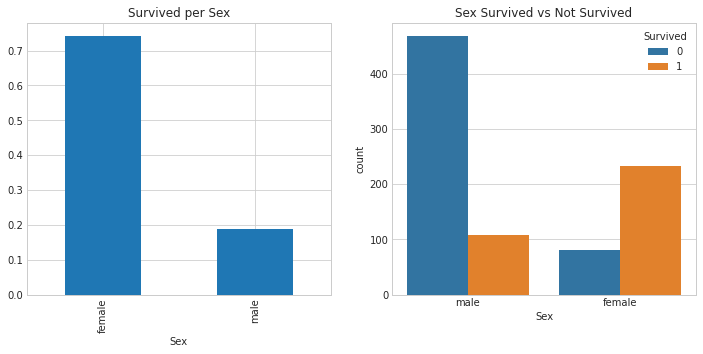

In [28]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')
# 여성이 상대적으로 생존율이 높음
# 남성은 생존보다 사망율이 높음
# 여성은 사망모다 생존율이 높음

In [29]:
#pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).T.style.background_gradient(cmap='summer_r')
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [30]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


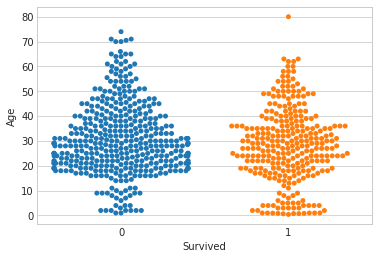

In [31]:
# Age 별 Survived 분포
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

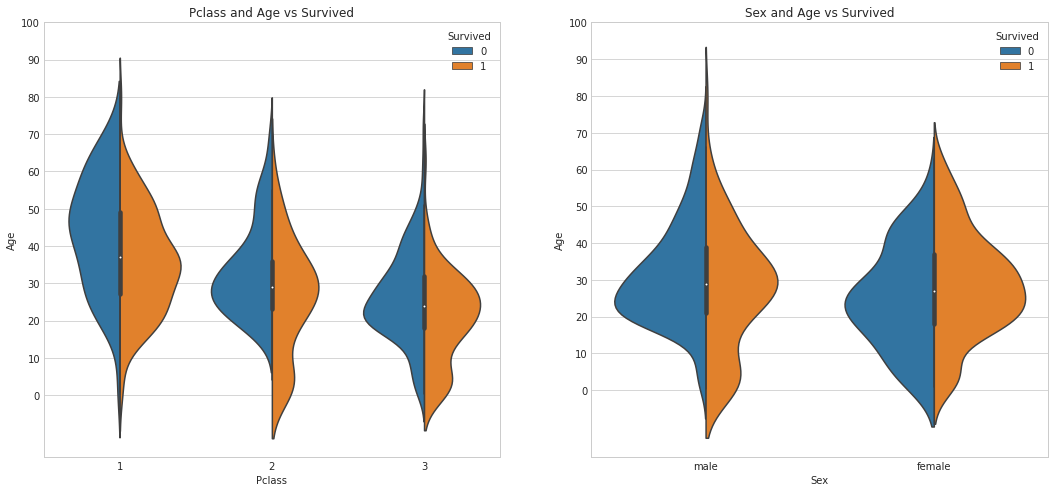

In [32]:
f, ax = plt.subplots(1,2,figsize=(18,8))

#"Pclass", "Age" 의  "Survived" 분포
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

#"Sex","Age" 의  "Survived" 분포
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [33]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1